In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Population is equal to top 500 zipcodes with most pills.
# Sample is equal to top 10 zipcodes with most pills.
df = pd.read_csv('pills-per-zipcode.csv')
df.Pills = df.Pills / 1e6
population = df.head(500)
sample = df.head(10)[::-1]

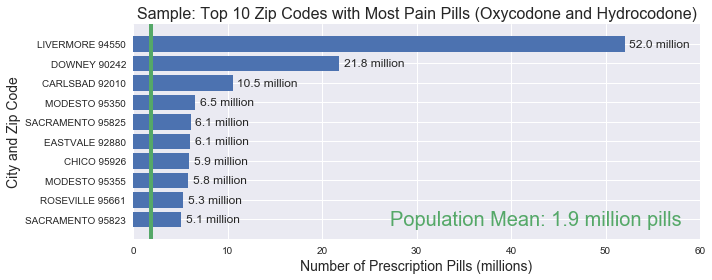

In [90]:
# Plot layout
plt.figure(figsize=(10,4))
plt.style.use('seaborn')

# Set new y tick labels
yticks = np.arange(len(sample))
yticklabels = [f'{x} {y}' for x, y in zip(sample.City, sample['Zip Code'])]

# Plot histograms and lines
plt.barh(yticks, sample.Pills)
plt.vlines(population.Pills.mean(), -1, 10, color='C1', lw=4)

# Text annotations
for i, p in enumerate(sample.Pills):
    plt.text(p+0.5, i, f'{p:.1f} million', verticalalignment='center', size=12)
plt.text(58, 0, f'Population Mean: {population.Pills.mean():.1f} million pills',
         size=20, color='C1', horizontalalignment='right',
        verticalalignment='center')

# Final layout changes
plt.yticks(yticks, yticklabels)
plt.xlim(0, 60)
plt.ylim(-1, 10)
plt.title('Sample: Top 10 Zip Codes with Most Pain Pills (Oxycodone and Hydrocodone)', size=16)
plt.xlabel('Number of Prescription Pills (millions)', size=14)
plt.ylabel('City and Zip Code', size=14)
plt.tight_layout()
plt.savefig('images/top10.png', dpi=300)